In [1]:
!pip3 install tensorflow pandas matplotlib numpy

In [4]:
!pip install scikit-learn --upgrade

     ---------------------------------------- 7.2/7.2 MB 12.4 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 KB 18.5 MB/s eta 0:00:00
     --------------------------------------- 37.0/37.0 MB 15.6 MB/s eta 0:00:00


In [1]:
!pip freeze

argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.5
attrs==21.4.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.0
cffi==1.15.0
colorama==0.4.4
debugpy==1.6.0
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==0.8.3
fastjsonschema==2.15.3
ipykernel==6.13.0
ipython==8.3.0
ipython-genutils==0.2.0
ipywidgets==7.7.0
jedi==0.18.1
Jinja2==3.1.2
jsonschema==4.4.0
jupyter==1.0.0
jupyter-client==7.3.0
jupyter-console==6.4.3
jupyter-core==4.10.0
jupyterlab-pygments==0.2.2
jupyterlab-widgets==1.1.0
MarkupSafe==2.1.1
matplotlib-inline==0.1.3
mistune==0.8.4
nbclient==0.6.0
nbconvert==6.5.0
nbformat==5.3.0
nest-asyncio==1.5.5
notebook==6.4.11
packaging==21.3
pandocfilters==1.5.0
parso==0.8.3
pickleshare==0.7.5
prometheus-client==0.14.1
prompt-toolkit==3.0.29
psutil==5.9.0
pure-eval==0.2.2
pycparser==2.21
Pygments==2.12.0
pyparsing==3.0.8
pyrsistent==0.18.1
python-dateutil==2.8.2
pywin32==304
pywinpty==2.0.5
pyzmq==22.3.0
qtconsole==5.3.0
QtPy==2.1.0
Send2Trash==1.8.0
si

In [1]:
import sklearn
import sys

sklearn.__version__

'1.0.2'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
import math
from sklearn.preprocessing import RobustScaler, StandardScaler

In [3]:
#In Machine Learning an attribute is a 
#data type (e.g., “mileage”), while a feature has several 
#meanings, depending on the context, but generally means 
#an attribute plus its value (e.g., “mileage = 15,000”). 
#Many people use the words attribute and feature interchangeably.

CLIP_FEATURES = ["feature01", "feature04", "feature05", "feature07", "feature19", "feature20", "feature21", "feature22",
                 "feature23", "feature24", "feature25", "feature26", "feature27", "feature28", "feature29", "feature30",
                 "feature31"]
LOG_SCALATION_FEATURES = ["feature02", "feature03", "feature34", "feature36"]

def normalizeCurrentAge(data_frame):
    current_dataframe = data_frame.copy()
    current_dataframe["current_age"] = (data_frame["current_age"]-MINS["current_age"])/(MAXS["current_age"]-MINS["current_age"])
    return current_dataframe
    
def normalizeVoiceFeaturesMINMAX(data_frame):
    pattern = re.compile("feature")
    current_dataframe = data_frame.copy()
    for elem in current_dataframe.keys():
        if (pattern.match(elem)) is not None and elem not in LOG_SCALATION_FEATURES:
            current_dataframe[elem] = (current_dataframe[elem]-MINS[elem])/(MAXS[elem]-MINS[elem])
    return current_dataframe

def normalizeVoiceFeaturesLOG(data_frame): #OLD
    current_dataframe = data_frame.copy()
    for elem in current_dataframe.keys():
        if elem in LOG_SCALATION_FEATURES:
            for idx in range(len(elem)):
                if current_dataframe[elem][idx] == 0.0:
                    current_dataframe[elem][idx] = -10000
                else:
                    #print(current_dataframe[elem][idx])
                    current_dataframe[elem][idx] = math.log(current_dataframe[elem][idx])
    return current_dataframe

def normalizeVoiceFeaturesROBUST(data_frame):
    pattern = re.compile("feature")
    current_dataframe = data_frame.copy()
    for elem in LOG_SCALATION_FEATURES:
        transformer = StandardScaler()
        current_dataframe[elem] = transformer.fit_transform(current_dataframe[[elem]])
        current_dataframe[elem] = transformer.transform(current_dataframe[[elem]])
    return current_dataframe
    
def normalizeSex(data_frame):
    current_dataframe = data_frame.copy().reset_index()
    n_sex = []
    for index in range(len(current_dataframe)):
        if current_dataframe["sex"][index] == "M":
            n_sex.append(0)
        else:
            n_sex.append(1)
    current_dataframe["sex"] = n_sex
    del current_dataframe["index"]
    return current_dataframe
    
def getDataFrameFeatures(data_frame):
    pattern = re.compile("feature")
    features_keys = ["sex", "current_age"]
    for elem in data_frame.keys():
        if (pattern.match(elem)) is not None:
            features_keys.append(elem)
    features_frame = data_frame[features_keys]
    features_frame = normalizeVoiceFeaturesMINMAX(features_frame)
    #features_frame = normalizeVoiceFeaturesROBUST(features_frame)
    features_frame = normalizeCurrentAge(features_frame)
    features_frame = normalizeSex(features_frame)
    return features_frame

def getDataFrameLabels(data_frame):
    TIENE_PARKINSON = 1
    NO_TIENE_PARKINSON = 0
    data_labels = []
    data_frame.head()
    for elem in data_frame["years_since_first_symptom"]:
        if (elem > 0):
            data_labels.append(TIENE_PARKINSON)
        else:
            data_labels.append(NO_TIENE_PARKINSON)
        #current_age no tiene valores invalidos, mirar grafo
        #years_since_first_symptom no tiene valores invalidos, mirar grafo
        #que pasa si edad < años con sintomas? checkAgeIsGraterThanSysptoms()
        #edades menores de 20? hay personas con 1 año !!
    return data_labels

def checkAgeIsGraterThanSysptoms(data_frame):
    valid_data_frame = data_frame.copy().reset_index()
    indexes = []
    for index in range(len(valid_data_frame)):
        if valid_data_frame["current_age"][index] < valid_data_frame["years_since_first_symptom"][index] or valid_data_frame["current_age"][index] < 20:
            indexes.append(index)
    valid_data_frame.drop(indexes)
    del valid_data_frame["index"]
    return valid_data_frame
    
def eliminateBadVoiceCodeElements(data_frame):
    valid_voice_code_elemnts = data_frame.copy()
    valid_voice_code_elemnts = valid_voice_code_elemnts.drop(valid_voice_code_elemnts[valid_voice_code_elemnts["voice_code"] == "bad" ].index)
    return valid_voice_code_elemnts

def eliminateEmptySexElements(data_frame):
    valid_voice_code_elemnts = data_frame.copy()
    valid_voice_code_elemnts = valid_voice_code_elemnts.drop(valid_voice_code_elemnts[valid_voice_code_elemnts["voice_code"] == "" ].index)
    return valid_voice_code_elemnts

def cleanDataFrame(data_frame):
    clean_data_frame = data_frame.copy()
    clean_data_frame = clean_data_frame.dropna()
    clean_data_frame = eliminateBadVoiceCodeElements(clean_data_frame)
    clean_data_frame = eliminateEmptySexElements(clean_data_frame)
    clean_data_frame = checkAgeIsGraterThanSysptoms(clean_data_frame)
    return clean_data_frame


#esta función proviene del libro Hands on Machine Learning con nombre split_train_test
def split_dataset(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def getMaxsAndMins(data_frame):
    NUMERICAL_TYPES = ["int64", "float64"]
    maxs = {}
    mins = {}
    current_dataframe = data_frame.copy().reset_index()
    for elem in current_dataframe.keys():
        if current_dataframe.dtypes[elem] in NUMERICAL_TYPES:
            maxs[elem] = current_dataframe[elem].max()
            mins[elem] = current_dataframe[elem].min()
    return maxs, mins


In [4]:
def load_data(file_name):
    return pd.read_csv( "datos/"+ file_name + ".csv")

ALL_DATA = pd.concat([load_data("plmpva_train"),load_data("plmpva_test-NoPDRS")])
MAXS, MINS = getMaxsAndMins(cleanDataFrame(ALL_DATA))
TRAIN_DATA, VALIDATION_DATA = split_dataset(cleanDataFrame(ALL_DATA), 0.2)
TRAIN_DATA , TEST_DATA = split_dataset(TRAIN_DATA, 0.2)
TRAIN_FEATURES = getDataFrameFeatures(TRAIN_DATA)
TRAIN_LABELS = getDataFrameLabels(TRAIN_DATA)
TEST_FEATURES = getDataFrameFeatures(cleanDataFrame(TEST_DATA))
TEST_LABELS = getDataFrameLabels(cleanDataFrame(TEST_DATA))
VALIDATION_FEATURES = getDataFrameFeatures(cleanDataFrame(VALIDATION_DATA))
VALIDATION_LABELS = getDataFrameLabels(cleanDataFrame(VALIDATION_DATA))

In [5]:
import random

def balance_data_set(data_set, labels):
    total = pd.concat(load_data("plmpva_train"),pd.DataFrame({'Labels': labels[:, 0]}))
    positives, negatives = split(total, total["labels"])
    num_negativos = np.count_nonzero(labels==0)
    indexes = random.sample(range(data_set.length()), data_set.length()-num_negativos)
    data_set.drop(indexes)
    return data_set

BALANCED_TRAIN_DATA = balance_data_set(TRAIN_FEATURES, TRAIN_LABELS)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
ALL_DATA.count()

In [9]:
ALL_DATA.describe()

,recording_duration,callref,audio_duration,voice_indexstart,voice_indexend,voice_usable_duration,feature01,feature02,feature03,feature04,...,dressing,hygiene,turning_in_bed,falling,freezing,walking,tremors,numbness,hoehn_yahr,calls_per_user
count,779.000000,7.790000e+02,779.00000,747.000000,747.000000,779.000000,747.000000,747.000000,747.000000,747.000000,...,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,779.000000
mean,20.032092,4.986891e+06,16.57820,3367.639893,97722.409639,11.309974,177.713703,299.633934,75.410771,0.277463,...,0.802057,0.688946,0.917738,0.737789,0.552699,1.277635,1.159383,0.763496,2.118252,1.641849
std,6.670177,2.901881e+06,7.05333,12411.413533,54920.233501,7.095025,55.544875,723.297574,742.998409,0.145549,...,0.728220,0.554649,0.785447,0.781972,0.916866,0.728675,0.846640,0.882595,1.010971,1.244564
min,5.000000,7.588000e+03,0.80800,1.000000,16240.000000,0.000000,90.281000,11.746000,7.582000,0.063000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,15.000000,2.412231e+06,11.29650,1.000000,52360.000000,5.545000,128.528000,34.871500,20.231500,0.180500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,20.000000,4.947052e+06,16.38900,1.000000,90800.000000,10.250000,173.508000,64.903000,29.361000,0.242000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,25.000000,7.542746e+06,21.80500,561.000000,134160.000000,15.970000,216.345000,210.492500,42.616000,0.332000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000
max,31.000000,9.997958e+06,29.77800,148801.000000,238000.000000,29.680000,447.690000,10686.682000,20046.373000,1.181000,...,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,9.000000


In [7]:
%matplotlib inline

<AxesSubplot:>

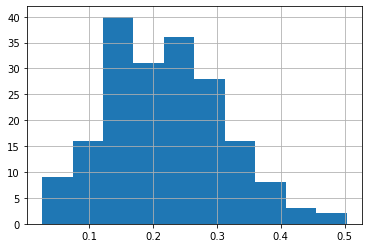

In [11]:
 from scipy.stats import zscore

def clipZScores(data_frame):
    current_dataframe = data_frame.copy()
    z_scores = zscore(current_dataframe[CLIP_FEATURES])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 2).all(axis=1)
    new_df = current_dataframe[filtered_entries]
    return new_df

#clipZScores(TRAIN_FEATURES)["feature06"].describe()
#clipZScores(TRAIN_FEATURES).hist(bins=50, figsize=(20,15))
clipZScores(TRAIN_FEATURES)["feature24"].hist()
#plt.show()

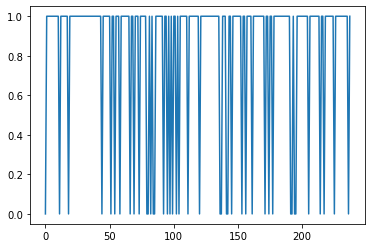

In [23]:
from matplotlib import pyplot as plt
plt.hist(TRAIN_FEATURES, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

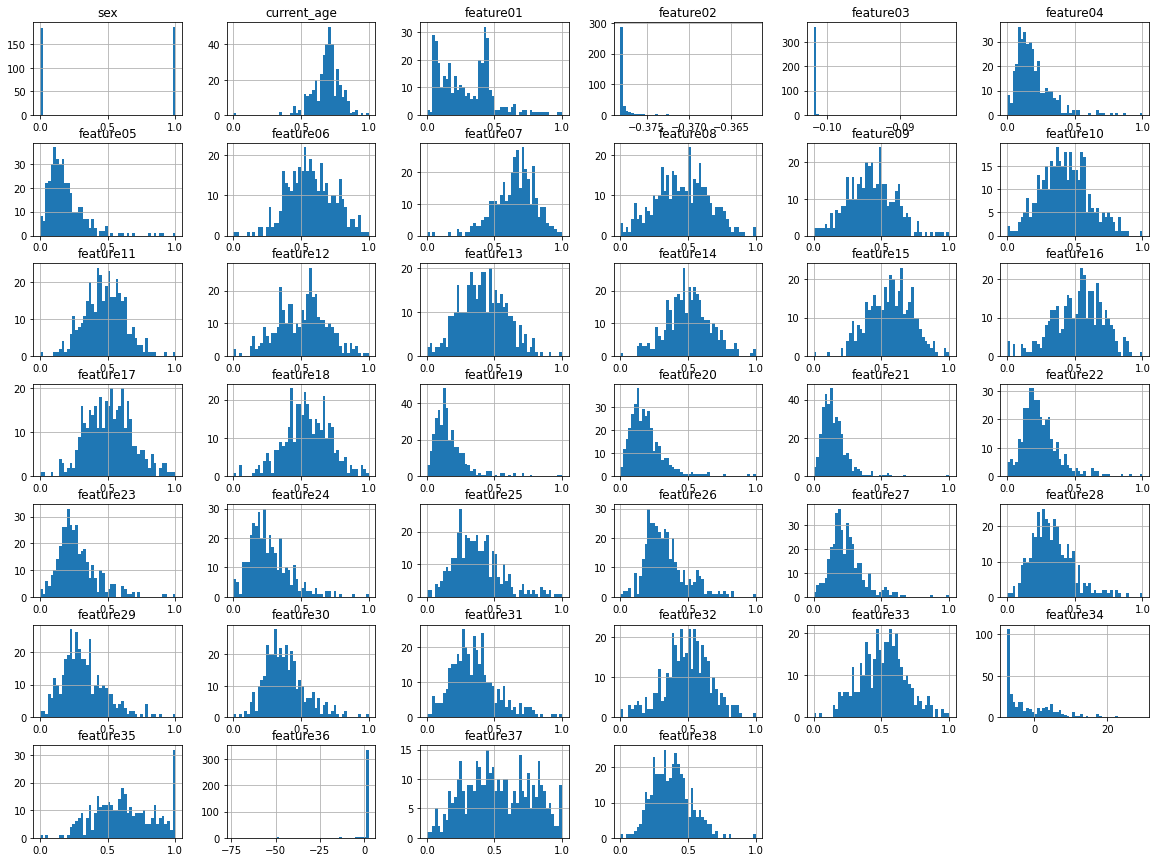

In [14]:
TRAIN_FEATURES.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
ALL_DATA["current_age"].describe()

count    779.000000
mean      62.546855
std       10.377145
min        0.000000
25%       57.000000
50%       64.000000
75%       68.000000
max       92.000000
Name: current_age, dtype: float64

<AxesSubplot:>

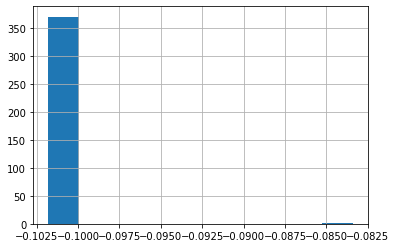

In [15]:
TRAIN_FEATURES["feature03"].hist()

In [240]:
TRAIN_DATA["voice_code"].value_counts()

ok     374
bad     15
Name: voice_code, dtype: int64

In [15]:
TEST_DATA["voice_code"].value_counts()

ok     373
bad     17
Name: voice_code, dtype: int64

In [5]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy, PrecisionAtRecall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [6]:
TRAIN_ARRAY = np.expand_dims(TRAIN_FEATURES.to_numpy(), axis=2)
TRAIN_LABELS_ARRAY = np.expand_dims(np.array(TRAIN_LABELS), axis=1) #tf.convert_to_tensor(TRAIN_LABELS)
VALIDATION_ARRAY = np.expand_dims(VALIDATION_FEATURES.to_numpy(), axis=2) #tf.convert_to_tensor(VALIDATION_FEATURES)
VALIDATION_LABELS_ARRAY = np.expand_dims(np.array(VALIDATION_LABELS), axis=1) #tf.convert_to_tensor(VALIDATION_LABELS)
TEST_ARRAY = np.expand_dims(TEST_FEATURES.to_numpy(), axis=2) #tf.convert_to_tensor(TEST_FEATURES)
TEST_LABELS_ARRAY = np.expand_dims(np.array(TEST_LABELS), axis=1) #tf.convert_to_tensor(TEST_LABELS)

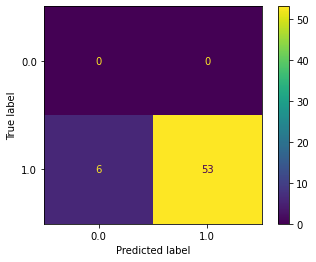

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

pred = model.predict(TEST_ARRAY)
ConfusionMatrixDisplay.from_predictions(pred, TEST_LABELS_ARRAY)
plt.show()

In [18]:
model = Sequential() 
model.add(Conv1D(input_shape=TRAIN_ARRAY.shape[1:],filters=64,kernel_size=(3),padding="same", activation="relu"))
model.add(Conv1D(filters=64,kernel_size=(3),padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=(2),strides=(2),padding="same"))
#model.add(Conv1D(filters=128, kernel_size=(3), padding="same", activation="relu"))
#model.add(Conv1D(filters=128, kernel_size=(3), padding="same", activation="relu"))
#model.add(MaxPool1D(pool_size=(2),strides=(2),padding="same"))
#model.add(Conv1D(filters=256, kernel_size=(3), padding="same", activation="relu"))
#model.add(Conv1D(filters=256, kernel_size=(3), padding="same", activation="relu"))
#model.add(Conv1D(filters=256, kernel_size=(3), padding="same", activation="relu"))
#model.add(MaxPool1D(pool_size=(2),strides=(2),padding="same"))
#model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
#model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
#model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
#model.add(MaxPool1D(pool_size=(2),strides=(2),padding="same"))
#model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
#model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
#model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
#model.add(MaxPool1D(pool_size=(2),strides=(2),padding="same"))
model.add(Flatten())
model.add(Dense(units=400,activation="relu", kernel_regularizer='l2'))
model.add(Dense(units=400,activation="relu", kernel_regularizer='l2'))
model.add(Dense( units=1, activation= "softmax"))
model.compile(optimizer=Adam(learning_rate=1e-3), loss=keras.losses.categorical_crossentropy, metrics=[Accuracy(), BinaryAccuracy(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives(), PrecisionAtRecall(0.9)])
#probar con binary_crossentropy también
model.summary()
res = model.fit(x=TRAIN_ARRAY, y=TRAIN_LABELS_ARRAY, epochs=10, verbose=2, validation_data = (VALIDATION_ARRAY, VALIDATION_LABELS_ARRAY) )

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_59 (Conv1D)          (None, 40, 64)            256       
                                                                 
 conv1d_60 (Conv1D)          (None, 40, 64)            12352     
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 20, 64)           0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 400)               512400    
                                                                 
 dense_13 (Dense)            (None, 400)               160400    
                                                     

In [17]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')

model = Sequential()
model.add(Conv1D(input_shape=TRAIN_ARRAY.shape[1:],filters=64,kernel_size=(3),padding="same", activation="relu"))
model.add(Conv1D(filters=64,kernel_size=(3),padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=(2),strides=(2)))
model.add(Conv1D(filters=128, kernel_size=(3), padding="same", activation="relu"))
model.add(Conv1D(filters=128, kernel_size=(3), padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=(2),strides=(2)))
model.add(Conv1D(filters=256, kernel_size=(3), padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=(3), padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=(3), padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=(2),strides=(2)))
model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=(2),strides=(2)))
model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=(3), padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=(2),strides=(2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax"))
model.compile(optimizer=Adam(learning_rate=1e-3, clipnorm = 1.0), loss=keras.losses.categorical_crossentropy, metrics=[Accuracy(), BinaryAccuracy(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives(), PrecisionAtRecall(0.9)])
res = model.fit(x=TRAIN_ARRAY, y=TRAIN_LABELS_ARRAY, epochs=10, verbose=2, validation_data = (VALIDATION_ARRAY, VALIDATION_LABELS_ARRAY) )
pred = model.predict(TEST_ARRAY);

Epoch 1/10
8/8 - 6s - loss: 0.0000e+00 - accuracy: 0.8193 - binary_accuracy: 0.8193 - true_positives_3: 195.0000 - true_negatives_3: 0.0000e+00 - false_positives_3: 43.0000 - false_negatives_3: 0.0000e+00 - precision_at_recall_3: 0.8193 - val_loss: 0.0000e+00 - val_accuracy: 0.9189 - val_binary_accuracy: 0.9189 - val_true_positives_3: 68.0000 - val_true_negatives_3: 0.0000e+00 - val_false_positives_3: 6.0000 - val_false_negatives_3: 0.0000e+00 - val_precision_at_recall_3: 0.9189 - 6s/epoch - 764ms/step
Epoch 2/10
8/8 - 2s - loss: 0.0000e+00 - accuracy: 0.8193 - binary_accuracy: 0.8193 - true_positives_3: 195.0000 - true_negatives_3: 0.0000e+00 - false_positives_3: 43.0000 - false_negatives_3: 0.0000e+00 - precision_at_recall_3: 0.8193 - val_loss: 0.0000e+00 - val_accuracy: 0.9189 - val_binary_accuracy: 0.9189 - val_true_positives_3: 68.0000 - val_true_negatives_3: 0.0000e+00 - val_false_positives_3: 6.0000 - val_false_negatives_3: 0.0000e+00 - val_precision_at_recall_3: 0.9189 - 2s/epo

In [11]:
!pip freeze

absl-py==1.0.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.1
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
anyio @ file:///C:/ci/anyio_1620153135622/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
arrow @ file:///C:/ci/arrow_1617738834352/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1629829318700/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1620866417880/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.func

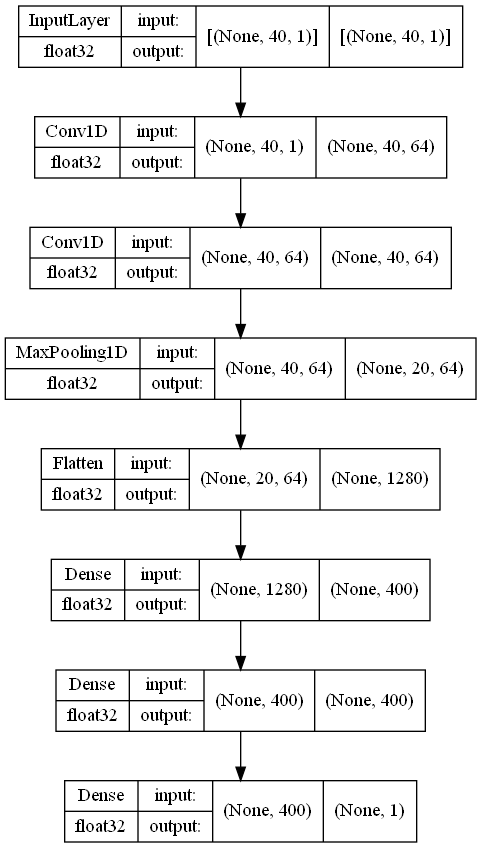

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [19]:
res = model.fit(x=TRAIN_ARRAY, y=TRAIN_LABELS_ARRAY, epochs=10, verbose=2, validation_data = (VALIDATION_ARRAY, VALIDATION_LABELS_ARRAY) )
#steps_per_epoch=100, generator=tf.convert_to_tensor(TRAIN_FEATURES), validation_data= tf.convert_to_tensor(TEST_FEATURES), validation_steps=10 ,epochs=100)

Epoch 1/10


ValueError: in user code:

    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "D:\Anaconda\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\Anaconda\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\Anaconda\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\Anaconda\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "D:\Anaconda\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 1, 512) are incompatible


In [133]:
metrics = model.evaluate(x = TEST_ARRAY, y=TEST_LABELS_ARRAY, verbose=2)

10/10 - 0s - loss: 0.0000e+00 - accuracy: 0.8601 - binary_accuracy: 0.8601 - true_positives_26: 252.0000 - true_negatives_26: 0.0000e+00 - false_positives_26: 41.0000 - false_negatives_26: 0.0000e+00 - precision_at_recall_26: 0.8601 - 439ms/epoch - 44ms/step


In [37]:
modelt = Sequential()
modelt.add(Dense(200, input_dim=40, activation='relu', kernel_regularizer='l2'))
#modelt.add(Dense(4000, activation='relu'))
#modelt.add(Dense(4000, activation='relu'))
modelt.add(Dense(200, activation='relu', kernel_regularizer='l2'))
modelt.add(Dense(1, activation='sigmoid'))
modelt.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Accuracy(), BinaryAccuracy(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()])
h = modelt.fit(TRAIN_ARRAY, TRAIN_LABELS_ARRAY, epochs=500, verbose=0, validation_data = (VALIDATION_ARRAY, VALIDATION_LABELS_ARRAY))
#h.history["loss"][-1], h.history["accuracy"][-1]
for key in h.history.keys():
    print (key + ":", h.history[key][-1], "\n")

loss: 0.4006834328174591 

accuracy: 0.0 

binary_accuracy: 0.8517520427703857 

true_positives_10: 316.0 

true_negatives_10: 0.0 

false_positives_10: 55.0 

false_negatives_10: 0.0 

val_loss: 0.3903636038303375 

val_accuracy: 0.0 

val_binary_accuracy: 0.8783783912658691 

val_true_positives_10: 65.0 

val_true_negatives_10: 0.0 

val_false_positives_10: 9.0 

val_false_negatives_10: 0.0 



In [16]:
h.history["loss"][-1], h.history["accuracy"][-1]

(0.012690847739577293, 0.1752021610736847)

In [ ]:
import matplotlib.ticker as ticker 

def plot_train_info(h):
        fig, ax = plt.subplots()
        ax.set_title("Train info")
        ax.set_ylim((0,1.05))
        ax.set_xlabel("Epoch")
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        ax.plot(range(len(h.history["loss"])), h.history["loss"],  c='r', label="Loss")
        ax.plot(range(len(h.history["binary_accuracy"])), h.history["binary_accuracy"], c='b', label="binary_accuracy")
        ax.margins(0.005)
        fig.tight_layout()
        ax.legend()
        plt.show()
        
plot_train_info(res)